In [2]:
import OpenSSL.crypto
import pandas as pd
import seaborn as sns
sns.set_theme()

In [3]:
speech_tempo_train = pd.read_csv('../data/bea-base-train-flat/speech_tempo_train_5000.csv')
speech_tempo_dev = pd.read_csv('../data/bea-base-train-flat/speech_tempo_dev_5000.csv')

In [6]:
speech_tempo_dev = speech_tempo_dev[0:1000]

In [7]:
speech_tempo_dev.shape

(1000, 5)

In [8]:
no_pause_speech_train = speech_tempo_train[['name', 'no_pause_speech']]
no_pause_speech_dev = speech_tempo_dev[['name', 'no_pause_speech']]

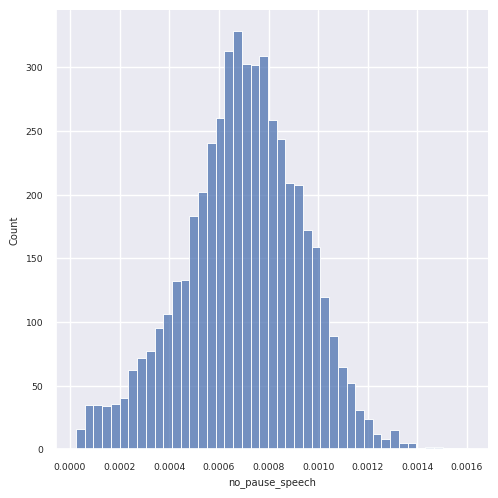

In [9]:
sns.set(font_scale=0.6)
sns.displot(no_pause_speech_train, x='no_pause_speech')

In [10]:
# Define threshold values and corresponding labels
thresholds = [0.00035, 0.0006, 0.0009, 0.0012]
labels = ['slow', 'midslow', 'normal', 'fast']

# Define function to apply to each element of the column
def label_element(val):
    if val < thresholds[0]:
        return labels[0]
    elif val >= thresholds[-1]:
        return labels[-1]
    else:
        for i in range(len(thresholds)-1):
            if thresholds[i] <= val < thresholds[i+1]:
                return labels[i+1]

In [11]:

tempo_targets = ['whole_speech', 'no_pause_speech']

for target in tempo_targets:

    # drop column
    if target == 'whole_speech':
        to_drop = ['no_pause_speech', 'length', 'whole_speech']
    elif target == 'no_pause_speech':
        to_drop = ['whole_speech', 'length', 'no_pause_speech']

    # Use apply method to apply the label_element function to each element of the column
    speech_tempo_train['speed'] = speech_tempo_train[target].apply(label_element)
    speech_tempo_train_new = speech_tempo_train.drop(to_drop, axis=1)

    speech_tempo_dev['speed'] = speech_tempo_dev[target].apply(label_element)
    speech_tempo_dev_new = speech_tempo_dev.drop(to_drop, axis=1)

    speech_tempo_train_new.to_csv('../data/bea-base-train-flat/{}_train_5000.csv'.format(target), index=False)
    speech_tempo_dev_new.to_csv('../data/bea-base-train-flat/{}_dev_5000.csv'.format(target), index=False)

/tmp/ipykernel_180339/2300052558.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  speech_tempo_dev['speed'] = speech_tempo_dev[target].apply(label_element)
/tmp/ipykernel_180339/2300052558.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  speech_tempo_dev['speed'] = speech_tempo_dev[target].apply(label_element)


In [13]:
speech_tempo_dev_new

,path,name,speed
0,/media/jvel/data/audio/Bea-base/bea-base-dev-s...,bea_037_f_20_stm_0001,slow
1,/media/jvel/data/audio/Bea-base/bea-base-dev-s...,bea_037_f_20_stm_0073,slow
2,/media/jvel/data/audio/Bea-base/bea-base-dev-s...,bea_037_f_20_stm_0074,midslow
3,/media/jvel/data/audio/Bea-base/bea-base-dev-s...,bea_037_f_20_stm_0075,normal
4,/media/jvel/data/audio/Bea-base/bea-base-dev-s...,bea_037_f_20_stm_0076,normal
...,...,...,...
995,/media/jvel/data/audio/Bea-base/bea-base-dev-s...,bea_075_f_45_stm_0669,slow
996,/media/jvel/data/audio/Bea-base/bea-base-dev-s...,bea_075_f_45_stm_0670,midslow
997,/media/jvel/data/audio/Bea-base/bea-base-dev-s...,bea_075_f_45_stm_0671,midslow
998,/media/jvel/data/audio/Bea-base/bea-base-dev-s...,bea_075_f_45_stm_0672,midslow


In [6]:
print(speech_tempo_train_new['label'].value_counts())
print(speech_tempo_dev_new['label'].value_counts())

In [21]:
speech_tempo_train_new

,path,name,speed
0,/media/jvel/data/audio/Bea-base/bea-base-train...,bea_001_m_41_stm_0055,slow
1,/media/jvel/data/audio/Bea-base/bea-base-train...,bea_001_m_41_stm_0056,slow
2,/media/jvel/data/audio/Bea-base/bea-base-train...,bea_001_m_41_stm_0058,midslow
3,/media/jvel/data/audio/Bea-base/bea-base-train...,bea_001_m_41_stm_0059,midslow
4,/media/jvel/data/audio/Bea-base/bea-base-train...,bea_001_m_41_stm_0063,slow
...,...,...,...
4995,/media/jvel/data/audio/Bea-base/bea-base-train...,bea_032_m_20_stm_0818,normal
4996,/media/jvel/data/audio/Bea-base/bea-base-train...,bea_032_m_20_stm_0819,normal
4997,/media/jvel/data/audio/Bea-base/bea-base-train...,bea_032_m_20_stm_0820,fast
4998,/media/jvel/data/audio/Bea-base/bea-base-train...,bea_032_m_20_stm_0821,normal


In [8]:
speech_tempo_train_new.to_csv('../data/bea-base-train-flat/new_whole_speech_train_5000.csv', index=False)

,path,name,no_pause_speech,length,label
0,/media/jvel/data/audio/Bea-base/bea-base-train...,bea_001_m_41_stm_0055,0.000159,2.362,slow
1,/media/jvel/data/audio/Bea-base/bea-base-train...,bea_001_m_41_stm_0056,0.000214,1.459,slow
2,/media/jvel/data/audio/Bea-base/bea-base-train...,bea_001_m_41_stm_0058,0.000520,3.723,midslow
3,/media/jvel/data/audio/Bea-base/bea-base-train...,bea_001_m_41_stm_0059,0.000591,0.952,midslow
4,/media/jvel/data/audio/Bea-base/bea-base-train...,bea_001_m_41_stm_0063,0.000175,1.430,slow
...,...,...,...,...,...
4995,/media/jvel/data/audio/Bea-base/bea-base-train...,bea_032_m_20_stm_0818,0.000814,3.609,normal
4996,/media/jvel/data/audio/Bea-base/bea-base-train...,bea_032_m_20_stm_0819,0.000733,5.625,normal
4997,/media/jvel/data/audio/Bea-base/bea-base-train...,bea_032_m_20_stm_0820,0.000916,5.594,fast
4998,/media/jvel/data/audio/Bea-base/bea-base-train...,bea_032_m_20_stm_0821,0.000873,2.077,normal


In [143]:
import os
os.getcwd()

'/home/jvel/PycharmProjects/wav2vec2_patho/speech_notebooks'